## Compairing Transect Data at the Tannana River Test Site 

In [1]:
from mhkit import dolfyn as dlfn
from dolfyn.adp import api
from mhkit.dolfyn.rotate import api as ap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from datetime import datetime
import xarray as xr
import scipy.interpolate as interp
import utm
from mhkit.river.io import d3d 
from os.path import abspath, dirname, join, normpath, relpath
import netCDF4
import math 
from mhkit import river
from matplotlib.pyplot import figure

C:\Users\eabrow\Codes\Tanana_test\dolfyn\dolfyn\velocity.py:12: AccessorRegistrationWarning: registration of accessor <class 'dolfyn.velocity.Velocity'> under name 'velds' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class Velocity():


Read in ADCP Data and merge it 

In [2]:
ds_02 = api.read('data/tanana_transects_08_10_10_0_002_10-08-10_142214.PD0')
ds_03 = api.read('data/tanana_transects_08_10_10_0_003_10-08-10_143335.PD0')

ds_02_03= xr.merge([ds_02,ds_03])
ds_02_03


Reading file data/tanana_transects_08_10_10_0_002_10-08-10_142214.PD0 ...

Reading file data/tanana_transects_08_10_10_0_003_10-08-10_143335.PD0 ...


<xarray.Dataset>
Dimensions:              (time_gps: 1180, time: 1180, beam: 4, dir: 4, range: 47, x: 4, x*: 4, earth: 3, inst: 3)
Coordinates:
  * time_gps             (time_gps) datetime64[ns] 2010-08-10T22:28:17.200000...
  * time                 (time) datetime64[ns] 2010-08-10T14:28:15.559999942 ...
  * beam                 (beam) int32 1 2 3 4
  * dir                  (dir) <U3 'X' 'Y' 'Z' 'err'
  * range                (range) float64 0.57 0.82 1.07 ... 11.57 11.82 12.07
  * x                    (x) int32 1 2 3 4
  * x*                   (x*) int32 1 2 3 4
  * earth                (earth) <U1 'E' 'N' 'U'
  * inst                 (inst) <U1 'X' 'Y' 'Z'
Data variables: (12/36)
    number               (time) float64 3.652e+03 3.653e+03 ... 4.904e+03
    builtin_test_fail    (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    c_sound              (time) float32 1.466e+03 1.466e+03 ... 1.466e+03
    depth                (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pitch                (time) float32 -0.1 -0.09 -0.21 -0.25 ... 0.2 0.07 0.56
    roll                 (time) float32 3.33 3.32 3.33 3.49 ... 2.24 2.65 2.33
    ...                   ...
    rtk_age_gps          (time_gps) float32 5.0 6.0 2.0 3.0 ... 6.0 2.0 3.0 3.0
    speed_over_grnd_gps  (time_gps) float32 0.03549 0.03395 ... 0.1096 0.1672
    dir_over_grnd_gps    (time_gps) float32 115.5 94.08 6.931 ... 160.5 182.1
    hdwtime_gps          (time_gps) datetime64[ns] 2010-08-10T14:28:15.559999...
    beam2inst_orientmat  (x, x*) float64 1.462 -1.462 0.0 ... -1.034 -1.034
    orientmat            (earth, inst, time) float64 -0.9037 -0.9025 ... 1.0 1.0
Attributes: (12/38)
    inst_make:                TRDI
    inst_type:                ADCP
    rotate_vars:              ['vel', 'vel_bt']
    has_imu:                  0
    prog_ver:                 10.16
    inst_model:               Rio Grande
    ...                       ...
    false_target_threshold:   50
    transmit_lag_m:           0.08
    bandwidth:                0
    sourceprog:               WINRIVER
    fs:                       11.11111111111111
    vel_gps_corrected:        0

In [44]:
ds_02.declination

AttributeError: 'Dataset' object has no attribute 'declination'

Convert form Lat and Long to UTM 

In [3]:
data=utm.from_latlon(ds_02_03.latitude_gps, ds_02_03.longitude_gps, 6, 'W')
latitude=data[0]
longitude=data[1]


data2=utm.from_latlon(ds_02.latitude_gps, ds_02.longitude_gps, 6, 'W')
latitude_2=data2[0]
longitude_2=data2[1]


data3=utm.from_latlon(ds_03.latitude_gps, ds_03.longitude_gps, 6, 'W')
latitude_3=data3[0]
longitude_3=data3[1]

Calculate indeal linear transect 

Text(0, 0.5, 'UTM y (m)')

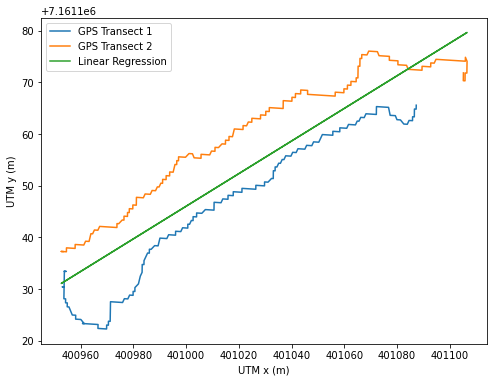

In [4]:
a,b = np.polyfit(latitude, longitude,1)
figure(figsize=(8,6))
plt.plot(latitude_2,longitude_2, label= 'GPS Transect 1')
plt.plot(latitude_3,longitude_3, label= 'GPS Transect 2')

plt.plot(latitude,a*latitude+b, label= 'Linear Regression')
plt.legend()
plt.xlabel('UTM x (m)')
plt.ylabel('UTM y (m)')
#plt.title('Boat Track')

In [5]:
# The ADCP transducers were measured to be 0.6 m from the feet of the lander
api.clean.set_range_offset(ds_02_03,0)
ds_02_03.range

<xarray.DataArray 'range' (range: 47)>
array([ 0.57,  0.82,  1.07,  1.32,  1.57,  1.82,  2.07,  2.32,  2.57,  2.82,
        3.07,  3.32,  3.57,  3.82,  4.07,  4.32,  4.57,  4.82,  5.07,  5.32,
        5.57,  5.82,  6.07,  6.32,  6.57,  6.82,  7.07,  7.32,  7.57,  7.82,
        8.07,  8.32,  8.57,  8.82,  9.07,  9.32,  9.57,  9.82, 10.07, 10.32,
       10.57, 10.82, 11.07, 11.32, 11.57, 11.82, 12.07])
Coordinates:
  * range    (range) float64 0.57 0.82 1.07 1.32 ... 11.32 11.57 11.82 12.07
Attributes:
    units:    m

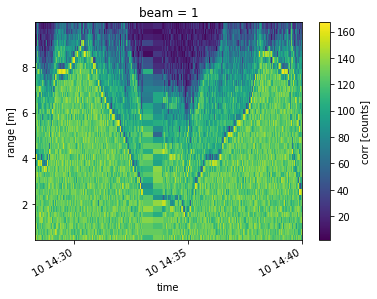

In [6]:
ds_02_03.corr.sel(beam=1, range=slice(0,10)).plot()
api.rotate2(ds_02_03, 'earth', inplace=True)
ds_02_03 = api.clean.correlation_filter(ds_02_03, thresh=40)

In [47]:
ap.set_declination(ds_02_03, 15.7, inplace=True) # 15.7 deg East for Nenana Alaska 

0.0

In [8]:
single_beam = ds_02_03.where(ds_02_03.dist_bt > 0 )
bottom=np.min(single_beam.dist_bt,axis=0)
#plt.scatter(np.linspace(0,np.size(bottom)-1,np.size(bottom)), -bottom)

In [9]:
bottom_filter= d3d.create_points(x=bottom.to_numpy(), y=ds_02_03.range.to_numpy(), waterdepth=1)
river_bottom_filter= []

for index, row in  bottom_filter.iterrows():
    if row['x'] > row['y']: 
        filter= 1
    
    else: 
        filter= float("nan")
    river_bottom_filter= np.append(river_bottom_filter, filter)

[0, 1, 2]


In [10]:
lat= np.tile(latitude, np.size( ds_02_03.range))
long= np.tile(longitude, np.size( ds_02_03.range))
depth =np.repeat( ds_02_03.range,np.size(latitude))
Point={'latitude': lat, 'longitude': long, 'waterdepth': depth}
points=pd.DataFrame(Point)
#plt.scatter(points.latitude, points.waterdepth)
#points

In [11]:
filter_points= d3d.create_points(x=np.linspace(0,np.size(bottom)-1,np.size(bottom)), y=ds_02_03.range.to_numpy(), waterdepth=1 )

[0, 1, 2]


In [12]:
velocity= np.ravel(ds_02_03.vel[1, :,:])* river_bottom_filter

In [13]:
lat_points= np.tile(latitude, np.size( ds_02_03.range))
long_points= np.tile(a*latitude+b, np.size( ds_02_03.range))
depth_points =np.repeat( ds_02_03.range,np.size(latitude))

ADCP_points={'latitude': lat_points, 'longitude': long_points, 'waterdepth': depth_points}
ADCP_points=pd.DataFrame(ADCP_points)
ADCP_points

,latitude,longitude,waterdepth
0,400953.813014,7.161131e+06,0.57
1,400953.813014,7.161131e+06,0.57
2,400953.813014,7.161131e+06,0.57
3,400953.813014,7.161131e+06,0.57
4,400953.813014,7.161131e+06,0.57
...,...,...,...
55455,400952.628168,7.161131e+06,12.07
55456,400952.628168,7.161131e+06,12.07
55457,400952.628168,7.161131e+06,12.07
55458,400952.628168,7.161131e+06,12.07


In [14]:
latitude_reduced= np.linspace(np.min(latitude), np.max(latitude),100)
gps= np.array([ [lat, long] for lat, long in zip(latitude,
                            longitude)]) 
gps_points = pd.DataFrame(gps, columns= ['latitude','longitude'])
print(gps_points)
ideal= np.array([ [lat, long] for lat, long in zip(latitude_reduced,
                            a*latitude_reduced+b)]) 
ideal_points = pd.DataFrame(ideal, columns= ['latitude','longitude'])
print(ideal_points)

           latitude     longitude
0     400953.813014  7.161133e+06
1     400953.813014  7.161133e+06
2     400953.813014  7.161133e+06
3     400953.813014  7.161133e+06
4     400953.813014  7.161133e+06
...             ...           ...
1175  400952.628168  7.161137e+06
1176  400952.628168  7.161137e+06
1177  400952.628168  7.161137e+06
1178  400952.628168  7.161137e+06
1179  400953.283108  7.161137e+06

[1180 rows x 2 columns]
         latitude     longitude
0   400952.628168  7.161131e+06
1   400954.182403  7.161132e+06
2   400955.736638  7.161132e+06
3   400957.290873  7.161133e+06
4   400958.845107  7.161133e+06
..            ...           ...
95  401100.280484  7.161178e+06
96  401101.834719  7.161178e+06
97  401103.388954  7.161179e+06
98  401104.943189  7.161179e+06
99  401106.497423  7.161180e+06

[100 rows x 2 columns]


In [15]:
lat_points= np.tile(latitude, np.size( ds_02_03.range))
long_points= np.tile(a*latitude+b, np.size( ds_02_03.range))
depth_points =np.repeat( ds_02_03.range,np.size(latitude))

ADCP_points={'latitude': lat_points, 'longitude': long_points, 'waterdepth': depth_points}
ADCP_points=pd.DataFrame(ADCP_points)
ADCP_points

,latitude,longitude,waterdepth
0,400953.813014,7.161131e+06,0.57
1,400953.813014,7.161131e+06,0.57
2,400953.813014,7.161131e+06,0.57
3,400953.813014,7.161131e+06,0.57
4,400953.813014,7.161131e+06,0.57
...,...,...,...
55455,400952.628168,7.161131e+06,12.07
55456,400952.628168,7.161131e+06,12.07
55457,400952.628168,7.161131e+06,12.07
55458,400952.628168,7.161131e+06,12.07


In [16]:
#interp points 

stat_lat = min(ADCP_points.latitude)
start_long= min(ADCP_points.longitude)

end_lat= max(ADCP_points.latitude)
end_long= min(ADCP_points.longitude)


(end_lat-stat_lat)/(math.cos(math.atan(a))*15)

10.757553827531847

In [17]:
lat_downsampeled = np.linspace(stat_lat,end_lat,10)
long_downsampeled= a*lat_downsampeled+b

In [18]:
lat_points_downsampled= np.tile(lat_downsampeled, np.size( ds_02_03.range))
long_points_downsampled= np.tile(long_downsampeled, np.size( ds_02_03.range))
depth_points_downsampled =np.repeat( ds_02_03.range,np.size(lat_downsampeled))

ADCP_points_downsamples={'latitude': lat_points_downsampled, 'longitude': long_points_downsampled, 'waterdepth': depth_points_downsampled}
ADCP_points_downsamples=pd.DataFrame(ADCP_points_downsamples)
ADCP_points_downsamples

,latitude,longitude,waterdepth
0,400952.628168,7.161131e+06,0.57
1,400969.724752,7.161136e+06,0.57
2,400986.821336,7.161142e+06,0.57
3,401003.917920,7.161147e+06,0.57
4,401021.014504,7.161153e+06,0.57
...,...,...,...
465,401038.111088,7.161158e+06,12.07
466,401055.207672,7.161163e+06,12.07
467,401072.304256,7.161169e+06,12.07
468,401089.400839,7.161174e+06,12.07


In [19]:
north= np.ravel(ds_02_03.vel[1, :,:])* river_bottom_filter
east= np.ravel(ds_02_03.vel[0, :,:])* river_bottom_filter
vert= np.ravel(ds_02_03.vel[2, :,:])* river_bottom_filter
points['north']=north
points['east']=east
points['vert']=vert
points

,latitude,longitude,waterdepth,north,east,vert
0,400953.813014,7.161133e+06,0.57,0.214233,-0.094245,-0.010
1,400953.813014,7.161133e+06,0.57,0.079026,0.181185,0.022
2,400953.813014,7.161133e+06,0.57,0.129486,-0.143789,-0.119
3,400953.813014,7.161133e+06,0.57,0.519561,-0.432847,-0.095
4,400953.813014,7.161133e+06,0.57,0.393507,-0.258352,-0.106
...,...,...,...,...,...,...
55455,400952.628168,7.161137e+06,12.07,NaN,NaN,NaN
55456,400952.628168,7.161137e+06,12.07,NaN,NaN,NaN
55457,400952.628168,7.161137e+06,12.07,NaN,NaN,NaN
55458,400952.628168,7.161137e+06,12.07,NaN,NaN,NaN


In [20]:
points= points.dropna()

In [21]:
points[['latitude','longitude','waterdepth']]

,latitude,longitude,waterdepth
0,400953.813014,7.161133e+06,0.57
1,400953.813014,7.161133e+06,0.57
2,400953.813014,7.161133e+06,0.57
3,400953.813014,7.161133e+06,0.57
4,400953.813014,7.161133e+06,0.57
...,...,...,...
36427,400989.066656,7.161150e+06,8.07
36428,400989.066656,7.161150e+06,8.07
37600,400991.049338,7.161150e+06,8.32
37601,400990.394398,7.161150e+06,8.32


In [22]:
# Project velocity onto ideal tansect 
ADCP= pd.DataFrame()
ADCP['East']=  interp.griddata(points[['latitude','longitude','waterdepth']],points['east'],ADCP_points, method='linear', fill_value=0)
ADCP['North']= interp.griddata(points[['latitude','longitude','waterdepth']],points['north'],ADCP_points, method='linear', fill_value=0)
ADCP['Vertical']=  interp.griddata(points[['latitude','longitude','waterdepth']],points['vert'],ADCP_points, method='linear', fill_value=0)
ADCP['Magnitude']= np.sqrt(ADCP.East**2+ADCP.North**2+ADCP.Vertical**2)
ADCP

,East,North,Vertical,Magnitude
0,-0.260626,0.37844,-0.040635,0.461296
1,-0.260626,0.37844,-0.040635,0.461296
2,-0.260626,0.37844,-0.040635,0.461296
3,-0.260626,0.37844,-0.040635,0.461296
4,-0.260626,0.37844,-0.040635,0.461296
...,...,...,...,...
55455,0.000000,0.00000,0.000000,0.000000
55456,0.000000,0.00000,0.000000,0.000000
55457,0.000000,0.00000,0.000000,0.000000
55458,0.000000,0.00000,0.000000,0.000000


In [23]:
ideal= np.array([ [lat, long] for lat, long in zip(latitude,
                            a*latitude+b)]) 
ideal_sampled_points = pd.DataFrame(ideal, columns= ['latitude','longitude'])

bottom_avg= interp.griddata(gps_points,bottom,ideal_sampled_points, method='linear')
bottom_filter = d3d.create_points(x=bottom_avg, y=ds_02_03.range.to_numpy(), waterdepth=1)
river_bottom_filter= []

for index, row in  bottom_filter.iterrows():
    if row['x'] > row['y']: 
        filter= 1
    
    else: 
        filter= float("nan")
    river_bottom_filter= np.append(river_bottom_filter, filter)
np.size(river_bottom_filter)

[0, 1, 2]


55460

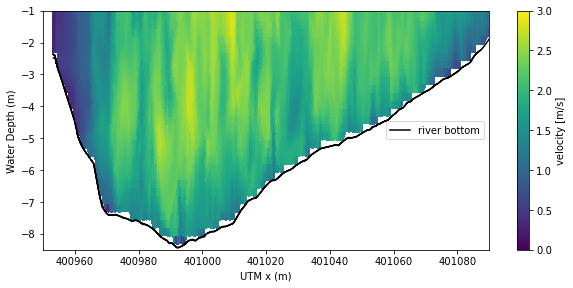

In [24]:
max_plot=3
min_plot=0

# Plotting 
plt.figure(figsize=(10,4.4))
contour_plot = plt.tripcolor(
    ADCP_points.latitude, 
    -ADCP_points.waterdepth, 
     ADCP.Magnitude*river_bottom_filter,
    vmin=min_plot,
    vmax=max_plot
)

plt.xlabel('UTM x (m)')
plt.ylabel('Water Depth (m)')
cbar= plt.colorbar(contour_plot)
cbar.set_label('velocity [m/s]')
plt.ylim([-8.5,-1])
plt.xlim([400950,401090])
plt.plot(ideal_sampled_points.latitude,-bottom_avg,'k', label= 'river bottom')
plt.legend(loc= 7)

In [25]:
lat_downsampeled = np.linspace(stat_lat,end_lat,10)
long_downsampeled= a*lat_downsampeled+b

ideal_downsampeled= np.array([ [lat, long] for lat, long in zip(lat_downsampeled,
                            a*lat_downsampeled+b)]) 
ideal_sampled_points_downsampled = pd.DataFrame(ideal_downsampeled, columns= ['latitude','longitude'])

bottom_avg_downsampled= interp.griddata(gps_points, bottom, ideal_sampled_points_downsampled, method='linear')
bottom_filter_downsampled = d3d.create_points(x=bottom_avg_downsampled, y=ds_02_03.range.to_numpy(), waterdepth=1)
river_bottom_filter_downsampled= []

for index, row in  bottom_filter_downsampled.iterrows():
    if row['x'] > row['y']: 
        filter= 1
    
    else: 
        filter= float("nan")
    river_bottom_filter_downsampled= np.append(river_bottom_filter_downsampled, filter)

[0, 1, 2]


In [26]:
ADCP_downsamples= pd.DataFrame()

ADCP_downsamples['East']=  interp.griddata(points[['latitude','longitude','waterdepth']],points['east'],ADCP_points_downsamples, method='linear', fill_value=0)
ADCP_downsamples['North']= interp.griddata(points[['latitude','longitude','waterdepth']],points['north'],ADCP_points_downsamples, method='linear', fill_value=0)
ADCP_downsamples['Vertical']=  interp.griddata(points[['latitude','longitude','waterdepth']],points['vert'],ADCP_points_downsamples, method='linear', fill_value=0)
ADCP_downsamples['Magnitude']= np.sqrt(ADCP_downsamples.East**2+ADCP_downsamples.North**2+ADCP_downsamples.Vertical**2)
ADCP_downsamples

,East,North,Vertical,Magnitude
0,0.000000,0.000000,0.000000,0.000000
1,-0.299220,1.083750,0.056287,1.125707
2,-0.763564,1.791223,-0.079519,1.948803
3,-1.020650,2.518240,0.039570,2.717503
4,-0.858775,2.080263,-0.056452,2.251261
...,...,...,...,...
465,0.000000,0.000000,0.000000,0.000000
466,0.000000,0.000000,0.000000,0.000000
467,0.000000,0.000000,0.000000,0.000000
468,0.000000,0.000000,0.000000,0.000000


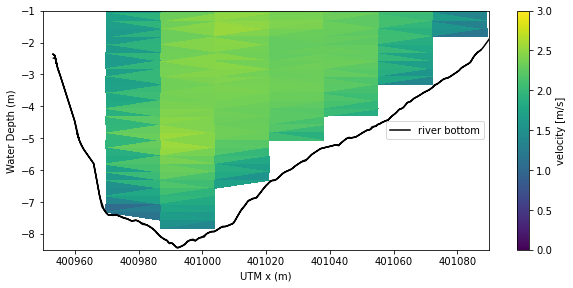

In [27]:
max_plot=3
min_plot=0

# Plotting 
plt.figure(figsize=(10,4.4))
contour_plot = plt.tripcolor(
    ADCP_points_downsamples.latitude, 
    -ADCP_points_downsamples.waterdepth, 
     ADCP_downsamples.Magnitude*river_bottom_filter_downsampled,
    vmin=min_plot,
    vmax=max_plot
)

plt.xlabel('UTM x (m)')
plt.ylabel('Water Depth (m)')
cbar= plt.colorbar(contour_plot)
cbar.set_label('velocity [m/s]')
plt.ylim([-8.5,-1])
plt.xlim([400950,401090])
plt.plot(ideal_sampled_points.latitude,-bottom_avg,'k', label= 'river bottom')
plt.legend(loc= 7)

In [28]:
x= lat_downsampeled
y= ds_02_03.range
xv, yv = np.meshgrid(x, y)

In [29]:
# Simulated data
# Downloading Data
d3d_data = netCDF4.Dataset('data/tanana81010_final_map.nc')

In [30]:
# Printing variable and description
for var in d3d_data.variables.keys():
    try: 
        d3d_data[var].long_name
    except:
        print(f'"{var}"')        
    else:
        print(f'"{var}": {d3d_data[var].long_name}')

"mesh2d_enc_x": x-coordinate
"mesh2d_enc_y": y-coordinate
"mesh2d_enc_node_count": count of coordinates in each instance geometry
"mesh2d_enc_part_node_count": count of nodes in each geometry part
"mesh2d_enc_interior_ring": type of each geometry part
"mesh2d_enclosure_container"
"Mesh2D"
"NetNode_x": x-coordinate
"NetNode_y": y-coordinate
"projected_coordinate_system"
"NetNode_z": bed level at net nodes (flow element corners)
"NetLink": link between two netnodes
"NetLinkType": type of netlink
"NetElemNode": mapping from net cell to net nodes (counterclockwise)
"NetElemLink": mapping from net cell to its net links (counterclockwise)
"NetLinkContour_x": list of x-contour points of momentum control volume surrounding each net/flow link
"NetLinkContour_y": list of y-contour points of momentum control volume surrounding each net/flow link
"NetLink_xu": x-coordinate of net link center (velocity point)
"NetLink_yu": y-coordinate of net link center (velocity point)
"BndLink": netlinks that co

In [31]:
ADCP_points_downsamples_xy= ADCP_points_downsamples.rename(columns={"latitude": "x", "longitude": "y"})


In [32]:
variables= ['ucy', 'ucx','ucz']
D3d= d3d.variable_interpolation(d3d_data, variables, points= ADCP_points_downsamples_xy)

points provided


In [33]:
D3d['Magnitude']=  np.sqrt(D3d.ucy**2+D3d.ucx**2+D3d.ucz**2)

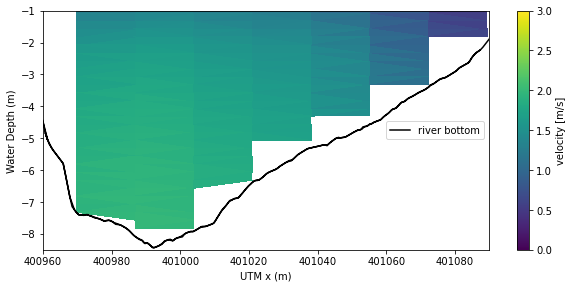

In [34]:
max_plot=3
min_plot=0

# Plotting 
plt.figure(figsize=(10,4.4))
contour_plot = plt.tripcolor(
    D3d.x, 
    -D3d.waterdepth, 
    D3d.Magnitude*river_bottom_filter_downsampled,
    vmin=min_plot,
    vmax=max_plot,
    #shading='gouraud'
    alpha=1
)
#*river_bottom_filter_downsampled

plt.xlabel('UTM x (m)')
plt.ylabel('Water Depth (m)')
#plt.title('Velocity in the Y direction')
cbar= plt.colorbar(contour_plot)
cbar.set_label('velocity [m/s]')
plt.ylim([-8.5,-1])
plt.xlim([400960,401090])
plt.plot(ideal_sampled_points.latitude,-bottom_avg,'k', label= 'river bottom')
plt.legend(loc= 7)

In [39]:
# L1

#north 
L1_Magnitude= abs(ADCP_downsamples.Magnitude-D3d.Magnitude)/ADCP_downsamples.Magnitude


0.29349619712405234

In [37]:
bottom_filter_downsampled= []
for i in  L1_Magnitude:
    if 1 > i: 
        filter= 1
    
    else: 
        filter= float("nan")
    bottom_filter_downsampled= np.append(bottom_filter_downsampled, filter)

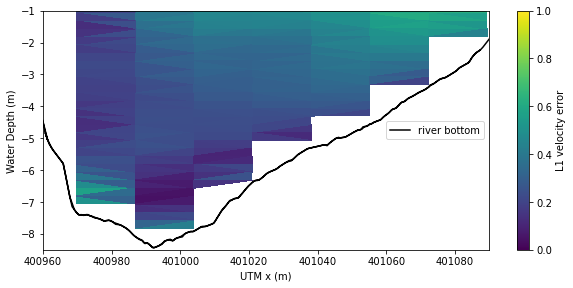

In [38]:
max_plot=1
min_plot=0
# Plotting 
plt.figure(figsize=(10,4.4))
contour_plot_L1 = plt.tripcolor(
    D3d.x, 
    -D3d.waterdepth, 
    L1_Magnitude*bottom_filter_downsampled*river_bottom_filter_downsampled,
        vmin=min_plot,
    vmax=max_plot
)

plt.xlim([400960,401090])
plt.ylim([-8.5,-1])
plt.xlabel('UTM x (m)')
plt.ylabel('Water Depth (m)')
#plt.title('L1 error between Delft3D and ADCP data for North velocity')
cbar= plt.colorbar(contour_plot_L1)
cbar.set_label('L1 velocity error')
plt.plot(ideal_sampled_points.latitude,-bottom_avg,'k', label= 'river bottom')
plt.legend(loc= 7)

MAE= np.sum(L1_Magnitude*bottom_filter_downsampled*river_bottom_filter_downsampled)/len(L1_Magnitude[L1_Magnitude< 1000 ])
MAE

0.11933076156639841


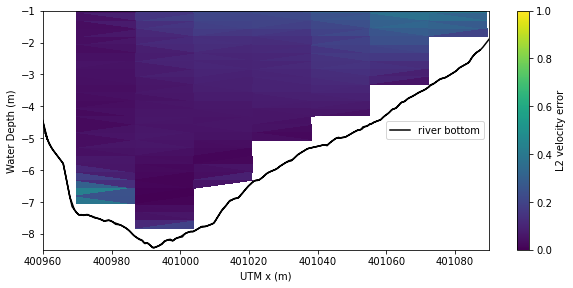

In [41]:
# L2 

L2_Magnitude= ((ADCP_downsamples.Magnitude-D3d.Magnitude)/ADCP_downsamples.Magnitude)**2

MSE=np.sum(L2_Magnitude*bottom_filter_downsampled*river_bottom_filter_downsampled)/np.size(L2_Magnitude[L2_Magnitude< 1000])

print(MSE)
L2_Mag=L2_Magnitude[L2_Magnitude>1]= float('nan')

max_plot=1
min_plot=0
# Plotting 
plt.figure(figsize=(10,4.4))
contour_plot_L2 = plt.tripcolor(
    D3d.x, 
    -D3d.waterdepth, 
    L2_Magnitude*bottom_filter_downsampled*river_bottom_filter_downsampled,
    vmin=min_plot,
    vmax=max_plot
)

plt.xlim([400960,401090])
plt.ylim([-8.5,-1])
plt.xlabel('UTM x (m)')
plt.ylabel('Water Depth (m)')
#plt.title('L2 error between Delft3D and ADCP data for North velocity')
cbar= plt.colorbar(contour_plot_L1)
cbar.set_label('L2 velocity error')
plt.plot(ideal_sampled_points.latitude,-bottom_avg,'k', label= 'river bottom')
plt.legend(loc= 7)

In [42]:
# L inf

L_inf=np.nanmax(L1_Magnitude[L1_Magnitude< 1000 ])
L_inf

#find location 
#is this the same max of L2? /
#error of downsampled data 

1.1679334582766387

In [43]:
L2_Magnitude[L2_Magnitude>1]

Series([], Name: Magnitude, dtype: float64)